In [3]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ctgan

     ---------------------------------------- 63.7/63.7 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ganblr import get_demo_data
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo


In [11]:
pip install ctgan

Note: you may need to restart the kernel to use updated packages.


In [12]:
def myfunc(df_data):
    X_real_train, X_holdout = train_test_split(df_data, test_size = 0.2, random_state= 69)
    return X_real_train, X_holdout

In [13]:
Real_Data = get_demo_data('adult')
X_real_train, X_holdout = myfunc(Real_Data)
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'class'
]
ctgan = CTGAN(epochs=100)
ctgan.fit(X_real_train, discrete_columns)

AttributeError: 'NoneType' object has no attribute 'split'

In [10]:
X_synthetic = ctgan.sample(10000)

AttributeError: 'NoneType' object has no attribute 'sample_original_condvec'

In [ ]:
name_to_model = {}
name_to_model['LR'] = LogisticRegression(max_iter = 1000)
name_to_model['XGB'] = XGBClassifier()
name_to_model['MLP'] = MLPClassifier()
name_to_model['RF'] = RandomForestClassifier()

In [ ]:
def eval(X_train, X_holdout, model_name):
    model = clone(name_to_model[model_name])
    model.fit(X_train.values[:,:-1],X_train.values[:,-1])
    y_holdout = X_holdout.values[:,-1]
    probs = model.predict_proba(X_holdout.values[:,:-1])
    probs = probs[:,1]
    y_pred = (probs>=0.5).astype(int)
    auc = roc_auc_score(y_holdout,probs)
    acc = accuracy_score(y_holdout,y_pred)
    precision = precision_score(y_holdout,y_pred)
    recall = recall_score(y_holdout,y_pred)
    print(f'Precision: {precision}, Recall: {recall}')
    probs_df = pd.concat([
        pd.Series(probs, name='probability').reset_index(drop=True),
        pd.Series(y_holdout, name='target').reset_index(drop=True)
    ], axis=1)
    sns.displot(data=probs_df, x='probability', hue='target', bins=20, multiple="stack")
    plt.title(f"Classifier: {model_name}, Accuracy: {acc:.1%}, AUC: {auc:.1%}", fontsize=20)
    plt.show()
    return auc

Precision: 0.6772563176895307, Recall: 0.3947811447811448


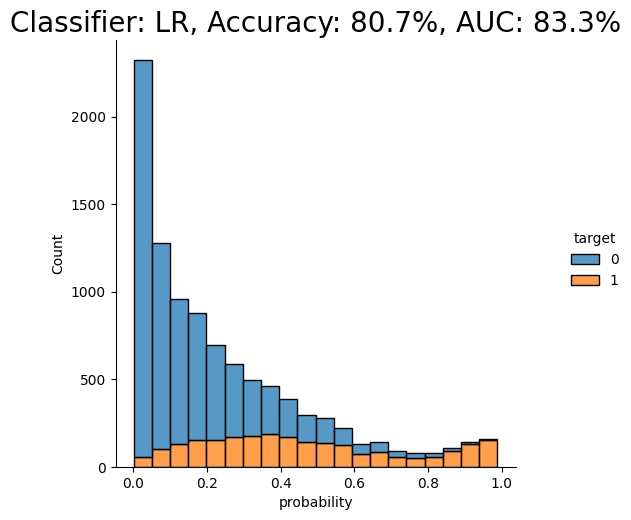

Precision: 0.13157894736842105, Recall: 0.0021043771043771043


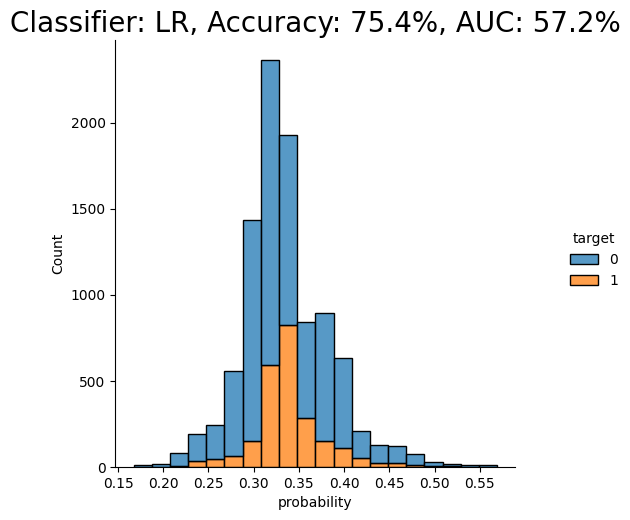

Precision: 0.7792207792207793, Recall: 0.6565656565656566


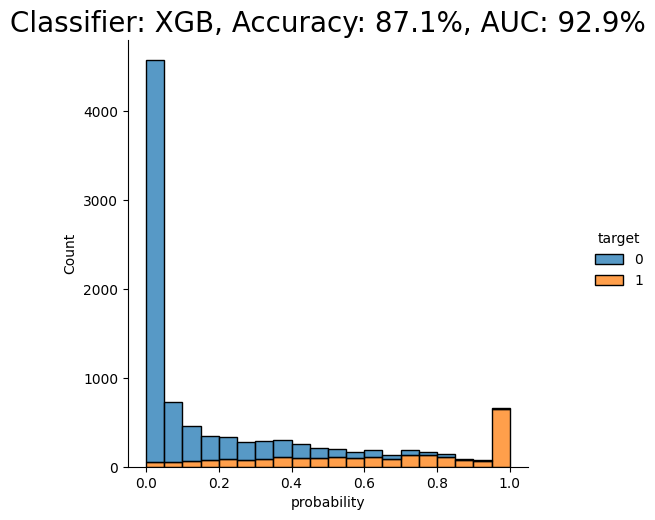

Precision: 0.31893892658852563, Recall: 0.2175925925925926


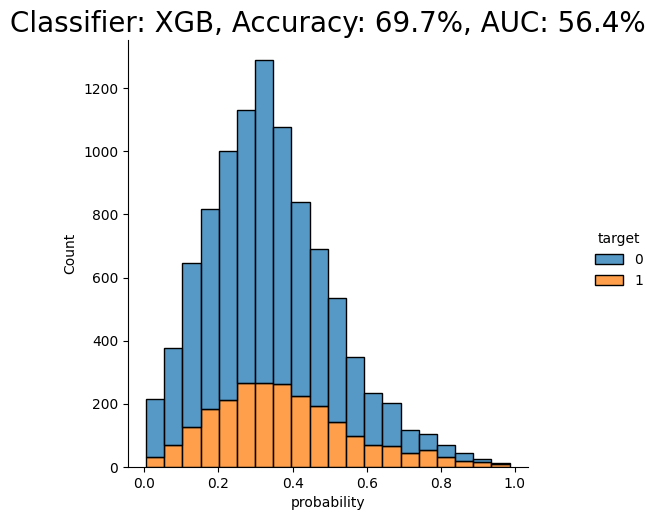

Precision: 0.7581120943952803, Recall: 0.5408249158249159


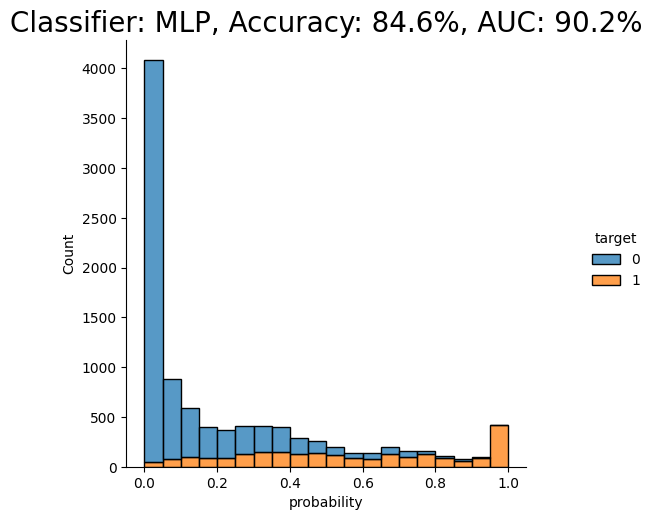

C:\Users\Parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.447682119205298, Recall: 0.14225589225589225


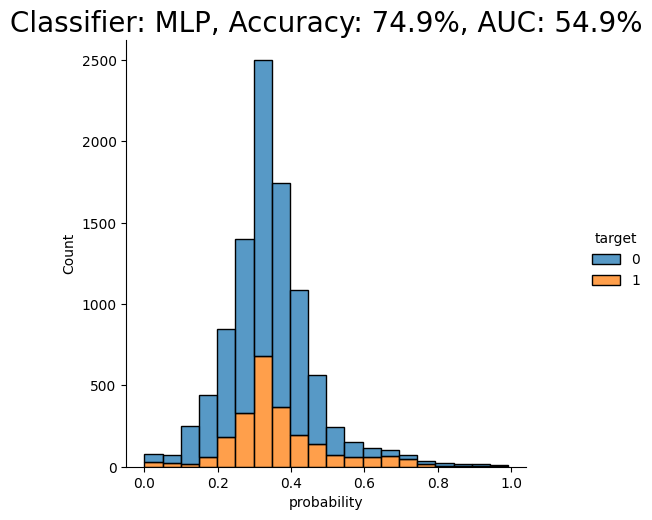

Precision: 0.71875, Recall: 0.6292087542087542


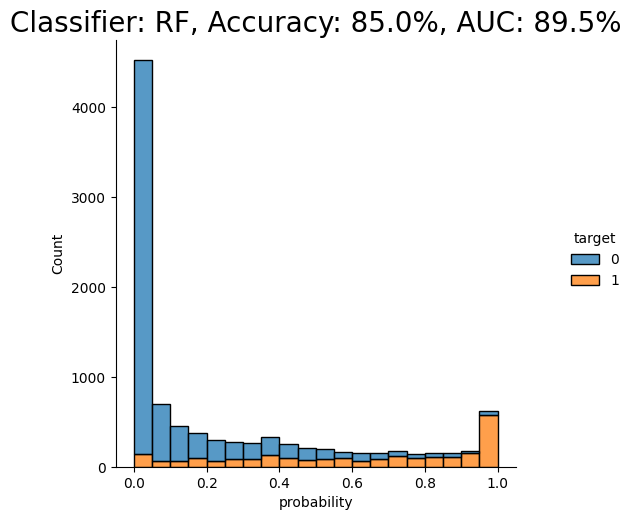

Precision: 0.3137982195845697, Recall: 0.17803030303030304


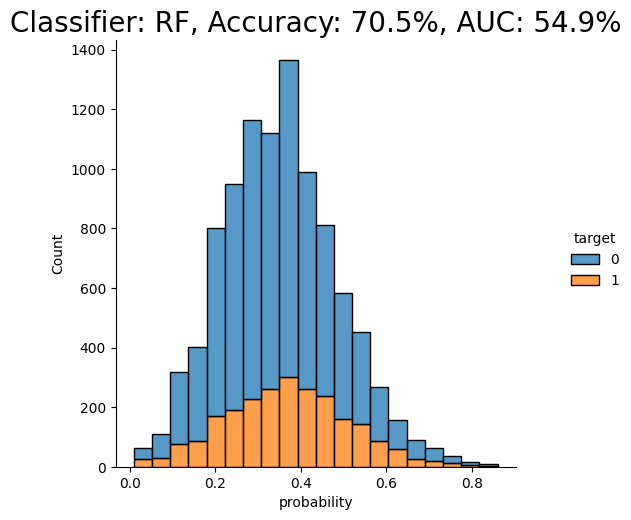

In [ ]:
for model_name in name_to_model.keys():
    auc = eval(X_real_train, X_holdout, model_name)
    auc = eval(X_synthetic,X_holdout,model_name)